In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
CKDU = pd.read_csv(r'C:\Users\acer\Desktop\ml\Test 1\CKDu_processed.csv')
X = CKDU.iloc[:, 1:33]  # Features
y = CKDU.iloc[:, 0]     # Target

# Assign feature names
feature_names = ['Age', 'S.creatinine', 'Na', 'Mg', 'K', 'Ca', 'Li', 'Be', 'Al', 'V',
                 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Se', 'Rb',
                 'Sr', 'Ag', 'Cd', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Pb', 'Bi', 'U']
X.columns = feature_names

# Split the dataset into training and test sets
X_train, y_train= (X, y)

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a dataframe to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the dataframe by importance (descending order)
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the most important features
print(importance_df)


         Feature  Importance
9              V    0.124808
27            Hg    0.110551
25            Cs    0.065810
18            As    0.062579
31             U    0.061089
1   S.creatinine    0.049469
30            Bi    0.044353
21            Sr    0.044087
26            Ba    0.043870
16            Zn    0.040353
5             Ca    0.037006
24            In    0.030985
2             Na    0.027886
23            Cd    0.024551
22            Ag    0.024116
17            Ga    0.021932
19            Se    0.020912
4              K    0.019323
29            Pb    0.018938
20            Rb    0.018109
8             Al    0.016718
28            Tl    0.015197
15            Cu    0.011148
10            Cr    0.010908
12            Fe    0.010367
14            Ni    0.009833
11            Mn    0.006420
0            Age    0.006382
6             Li    0.006039
13            Co    0.005893
3             Mg    0.005718
7             Be    0.004651


In [10]:
import statsmodels.api as sm
import pandas as pd

# Load the dataset
CKDU = pd.read_csv(r'C:\Users\acer\Desktop\ml\Test 1\CKDu_processed.csv')
Features = CKDU.iloc[:, 1:33]  # Features
Target = CKDU.iloc[:, 0]  # Target

# Add a constant column to the features
Features = sm.add_constant(Features)

# Perform linear regression- using OLS
lr = sm.OLS(Target, Features).fit()

# Get the p-values for each feature
p_values = lr.pvalues[1:]  # Exclude the constant column

# Assign p-values to features
feature_names = ['Age', 'S.creatinine', 'Na', 'Mg', 'K', 'Ca', 'Li', 'Be', 'Al', 'V',
                 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Se', 'Rb',
                 'Sr', 'Ag', 'Cd', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Pb', 'Bi', 'U']

p_values_dict = dict(zip(feature_names, p_values))

# Sort p-values in ascending order
sorted_p_values = sorted(p_values_dict.items(), key=lambda x: x[1])

# Print the sorted p-values for each feature
for feature, p_value in sorted_p_values:
    print(f"Feature: {feature}, p-value: {p_value}")


Feature: Hg, p-value: 2.7919612164410684e-13
Feature: Mg, p-value: 7.989744236339922e-11
Feature: Al, p-value: 2.2209270609448906e-07
Feature: As, p-value: 3.221226337704387e-07
Feature: K, p-value: 1.366819033714038e-06
Feature: Na, p-value: 4.312708728835348e-06
Feature: Ba, p-value: 7.076722147521025e-06
Feature: Ca, p-value: 1.6264698741067636e-05
Feature: Rb, p-value: 0.00012848146263207315
Feature: V, p-value: 0.0004505366786628838
Feature: Se, p-value: 0.0009843579017723215
Feature: Mn, p-value: 0.0015188217966462822
Feature: Ga, p-value: 0.0037831299738475916
Feature: S.creatinine, p-value: 0.003840211924672628
Feature: Ni, p-value: 0.006221427481094771
Feature: Bi, p-value: 0.012504455146409632
Feature: Ag, p-value: 0.027565817102055322
Feature: Cs, p-value: 0.04852716583331214
Feature: Age, p-value: 0.06187335272281828
Feature: Zn, p-value: 0.07149723836693625
Feature: Cu, p-value: 0.16705562429253093
Feature: Be, p-value: 0.17253778356118873
Feature: Co, p-value: 0.227004415

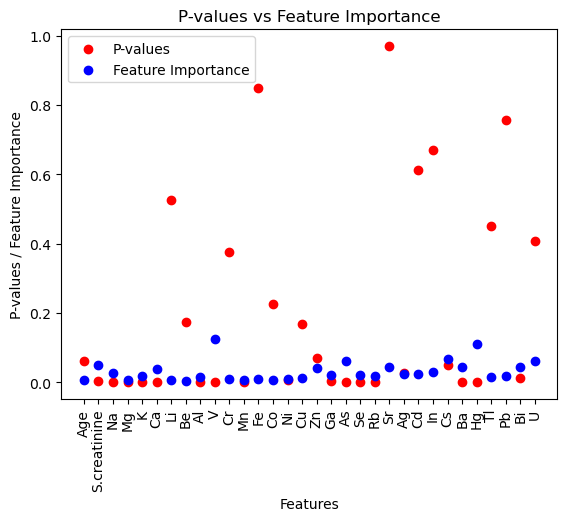

In [4]:
import matplotlib.pyplot as plt

# P-values
p_values = [0.06187335272281828, 0.003840211924672628, 4.312708728835348e-06, 7.989744236339922e-11,
            1.366819033714038e-06, 1.6264698741067636e-05, 0.5267822075237036, 0.17253778356118873,
            2.2209270609448906e-07, 0.0004505366786628838, 0.37651175636624334, 0.0015188217966462822,
            0.8488131718521674, 0.22700441573252078, 0.006221427481094771, 0.16705562429253093,
            0.07149723836693625, 0.0037831299738475916, 3.221226337704387e-07, 0.0009843579017723215,
            0.00012848146263207315, 0.9691065426659291, 0.027565817102055322, 0.6112511726369209,
            0.67072760091509, 0.04852716583331214, 7.076722147521025e-06, 2.7919612164410684e-13,
            0.4512122057586787, 0.7553579328259106, 0.012504455146409632, 0.4072559577695647]

# Feature Importance Values
feature_importance_values = [0.006382, 0.049469, 0.027886, 0.005718, 0.019323, 0.037006, 0.006039, 0.004651,
                             0.016718, 0.124808, 0.010908, 0.00642, 0.010367, 0.005893, 0.009833, 0.011148,
                             0.040353, 0.021932, 0.062579, 0.020912, 0.018109, 0.044087, 0.024116, 0.024551,
                             0.030985, 0.06581, 0.04387, 0.110551, 0.015197, 0.018938, 0.044353, 0.061089]

# Feature names
feature_names = ['Age', 'S.creatinine', 'Na', 'Mg', 'K', 'Ca', 'Li', 'Be', 'Al', 'V',
                 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Se', 'Rb',
                 'Sr', 'Ag', 'Cd', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Pb', 'Bi', 'U']

# Create the figure and axis
fig, ax = plt.subplots()

# Plot p-values in red
ax.scatter(feature_names, p_values, color='red', label='P-values')

# Plot feature importance values in blue
ax.scatter(feature_names, feature_importance_values, color='blue', label='Feature Importance')

# Customize the chart
plt.xlabel('Features')
plt.ylabel('P-values / Feature Importance')
plt.title('P-values vs Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()

# Show the plot
plt.show()


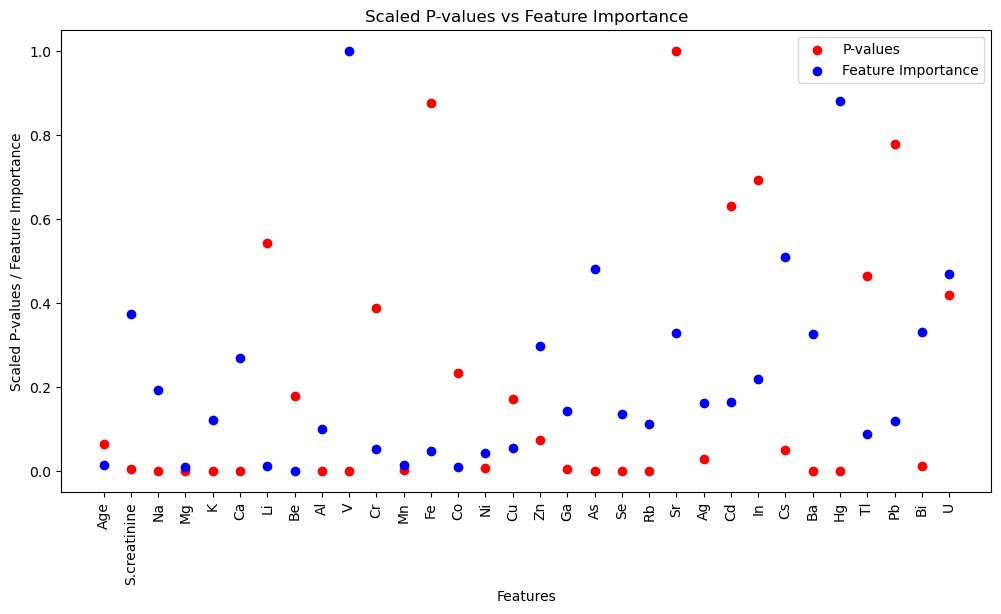

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# P-values
p_values = [0.06187335272281828, 0.003840211924672628, 4.312708728835348e-06, 7.989744236339922e-11,
            1.366819033714038e-06, 1.6264698741067636e-05, 0.5267822075237036, 0.17253778356118873,
            2.2209270609448906e-07, 0.0004505366786628838, 0.37651175636624334, 0.0015188217966462822,
            0.8488131718521674, 0.22700441573252078, 0.006221427481094771, 0.16705562429253093,
            0.07149723836693625, 0.0037831299738475916, 3.221226337704387e-07, 0.0009843579017723215,
            0.00012848146263207315, 0.9691065426659291, 0.027565817102055322, 0.6112511726369209,
            0.67072760091509, 0.04852716583331214, 7.076722147521025e-06, 2.7919612164410684e-13,
            0.4512122057586787, 0.7553579328259106, 0.012504455146409632, 0.4072559577695647]

# Feature Importance Values
feature_importance_values = [0.006382, 0.049469, 0.027886, 0.005718, 0.019323, 0.037006, 0.006039, 0.004651,
                             0.016718, 0.124808, 0.010908, 0.00642, 0.010367, 0.005893, 0.009833, 0.011148,
                             0.040353, 0.021932, 0.062579, 0.020912, 0.018109, 0.044087, 0.024116, 0.024551,
                             0.030985, 0.06581, 0.04387, 0.110551, 0.015197, 0.018938, 0.044353, 0.061089]

# Feature names
feature_names = ['Age', 'S.creatinine', 'Na', 'Mg', 'K', 'Ca', 'Li', 'Be', 'Al', 'V',
                 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Se', 'Rb',
                 'Sr', 'Ag', 'Cd', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Pb', 'Bi', 'U']

# Generate unique colors for each feature
colors = plt.cm.tab20(np.linspace(0, 1, len(feature_names)))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.scatter(p_values, feature_importance_values, color=colors)

# Customize the chart
plt.xlabel('P-values')
plt.ylabel('Feature Importance')
plt.title('P-values vs Feature Importan bce')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add legend for feature names
for i, feature_name in enumerate(feature_names):
    plt.text(p_values[i], feature_importance_values[i], feature_name, fontsize=8)

# Show the plot
plt.show()


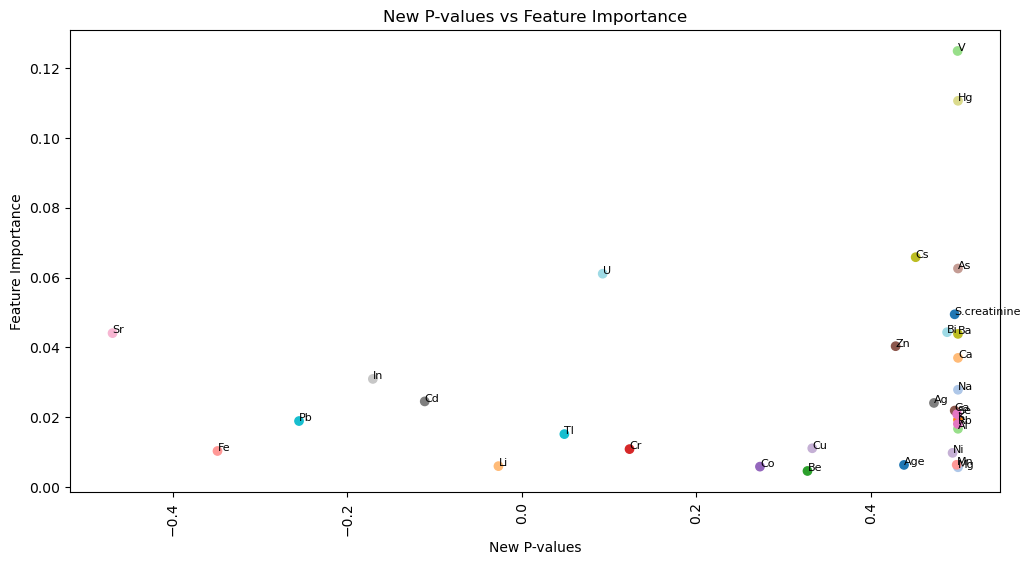

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# P-values
p_values = [0.06187335272281828, 0.003840211924672628, 4.312708728835348e-06, 7.989744236339922e-11,
            1.366819033714038e-06, 1.6264698741067636e-05, 0.5267822075237036, 0.17253778356118873,
            2.2209270609448906e-07, 0.0004505366786628838, 0.37651175636624334, 0.0015188217966462822,
            0.8488131718521674, 0.22700441573252078, 0.006221427481094771, 0.16705562429253093,
            0.07149723836693625, 0.0037831299738475916, 3.221226337704387e-07, 0.0009843579017723215,
            0.00012848146263207315, 0.9691065426659291, 0.027565817102055322, 0.6112511726369209,
            0.67072760091509, 0.04852716583331214, 7.076722147521025e-06, 2.7919612164410684e-13,
            0.4512122057586787, 0.7553579328259106, 0.012504455146409632, 0.4072559577695647]

# Calculate new p-values
new_p_values = [0.5 - p for p in p_values]

# Feature Importance Values
feature_importance_values = [0.006382, 0.049469, 0.027886, 0.005718, 0.019323, 0.037006, 0.006039, 0.004651,
                             0.016718, 0.124808, 0.010908, 0.00642, 0.010367, 0.005893, 0.009833, 0.011148,
                             0.040353, 0.021932, 0.062579, 0.020912, 0.018109, 0.044087, 0.024116, 0.024551,
                             0.030985, 0.06581, 0.04387, 0.110551, 0.015197, 0.018938, 0.044353, 0.061089]

# Feature names
feature_names = ['Age', 'S.creatinine', 'Na', 'Mg', 'K', 'Ca', 'Li', 'Be', 'Al', 'V',
                 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Se', 'Rb',
                 'Sr', 'Ag', 'Cd', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Pb', 'Bi', 'U']

# Generate unique colors for each feature
colors = plt.cm.tab20(np.linspace(0, 1, len(feature_names)))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.scatter(new_p_values, feature_importance_values, color=colors)

# Customize the chart
plt.xlabel('New P-values')
plt.ylabel('Feature Importance')
plt.title('New P-values vs Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add legend for feature names
for i, feature_name in enumerate(feature_names):
    plt.text(new_p_values[i], feature_importance_values[i], feature_name, fontsize=8)

# Show the plot
plt.show()


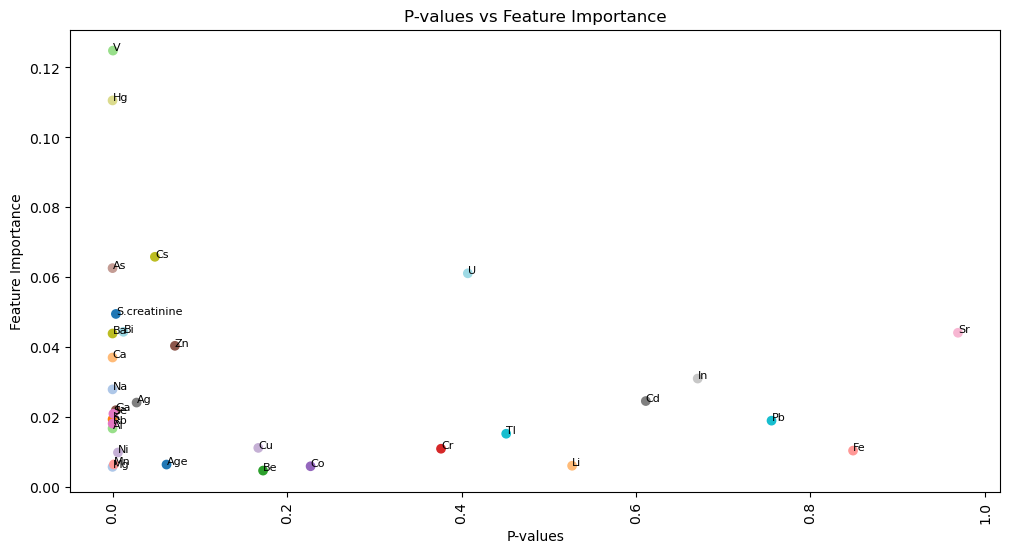

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# P-values
p_values = [0.06187335272281828, 0.003840211924672628, 4.312708728835348e-06, 7.989744236339922e-11,
            1.366819033714038e-06, 1.6264698741067636e-05, 0.5267822075237036, 0.17253778356118873,
            2.2209270609448906e-07, 0.0004505366786628838, 0.37651175636624334, 0.0015188217966462822,
            0.8488131718521674, 0.22700441573252078, 0.006221427481094771, 0.16705562429253093,
            0.07149723836693625, 0.0037831299738475916, 3.221226337704387e-07, 0.0009843579017723215,
            0.00012848146263207315, 0.9691065426659291, 0.027565817102055322, 0.6112511726369209,
            0.67072760091509, 0.04852716583331214, 7.076722147521025e-06, 2.7919612164410684e-13,
            0.4512122057586787, 0.7553579328259106, 0.012504455146409632, 0.4072559577695647]

# Feature Importance Values
feature_importance_values = [0.006382, 0.049469, 0.027886, 0.005718, 0.019323, 0.037006, 0.006039, 0.004651,
                             0.016718, 0.124808, 0.010908, 0.00642, 0.010367, 0.005893, 0.009833, 0.011148,
                             0.040353, 0.021932, 0.062579, 0.020912, 0.018109, 0.044087, 0.024116, 0.024551,
                             0.030985, 0.06581, 0.04387, 0.110551, 0.015197, 0.018938, 0.044353, 0.061089]

# Feature names
feature_names = ['Age', 'S.creatinine', 'Na', 'Mg', 'K', 'Ca', 'Li', 'Be', 'Al', 'V',
                 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Se', 'Rb',
                 'Sr', 'Ag', 'Cd', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Pb', 'Bi', 'U']

# Generate unique colors for each feature
colors = plt.cm.tab20(np.linspace(0, 1, len(feature_names)))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.scatter(p_values, feature_importance_values, color=colors)

# Customize the chart
plt.xlabel('P-values')
plt.ylabel('Feature Importance')
plt.title('P-values vs Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add legend for feature names
for i, feature_name in enumerate(feature_names):
    plt.text(p_values[i], feature_importance_values[i], feature_name, fontsize=8)

# Show the plot
plt.show()


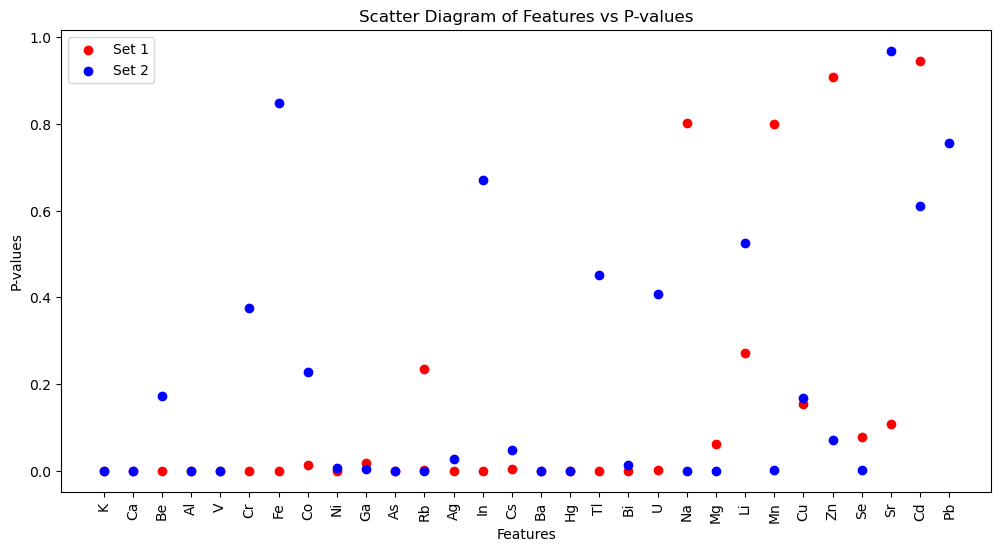

In [14]:
import matplotlib.pyplot as plt

# Set 1 values
features_set1 = ['K', 'Ca', 'Be', 'Al', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Ga',
                 'As', 'Rb', 'Ag', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Bi', 'U','Na', 'Mg', 'Li', 'Mn', 'Cu', 'Zn', 'Se', 'Sr', 'Cd', 'Rb']
p_values_set1 = [0, 0, 0, 0, 0, 0, 0, 0.013, 0, 0.019, 0, 0.001, 0, 0, 0.004, 0, 0, 0, 0, 0.001,0.803, 0.062, 0.272, 0.800, 0.155, 0.908, 0.079, 0.108, 0.945, 0.234]

# Set 2 values
features_set2 = ['Hg', 'Mg', 'Al', 'As', 'K', 'Na', 'Ba', 'Ca', 'Rb', 'V',
                 'Se', 'Mn', 'Ga', 'Ni', 'Bi', 'Ag', 'Cs', 'Zn', 'Cu', 'Be',
                 'Co', 'Cr', 'U', 'Tl', 'Li', 'Cd', 'In', 'Pb', 'Fe', 'Sr']
p_values_set2 = [2.7919612164410684e-13, 7.989744236339922e-11, 2.2209270609448906e-07, 3.221226337704387e-07,
                 1.366819033714038e-06, 4.312708728835348e-06, 7.076722147521025e-06, 1.6264698741067636e-05,
                 0.00012848146263207315, 0.0004505366786628838, 0.0009843579017723215, 0.0015188217966462822,
                 0.0037831299738475916, 0.006221427481094771, 0.012504455146409632, 0.027565817102055322,
                 0.04852716583331214, 0.07149723836693625, 0.16705562429253093, 0.17253778356118873,
                 0.22700441573252078, 0.37651175636624334, 0.4072559577695647, 0.4512122057586787,
                 0.5267822075237036, 0.6112511726369209, 0.67072760091509, 0.7553579328259106,
                 0.8488131718521674, 0.9691065426659291]

# Plot the scatter diagram
plt.figure(figsize=(12, 6))
plt.scatter(features_set1, p_values_set1, color='red', label='Set 1')
plt.scatter(features_set2, p_values_set2, color='blue', label='Set 2')
plt.xlabel('Features')
plt.ylabel('P-values')
plt.title('Scatter Diagram of Features vs P-values')
plt.legend()
plt.xticks(rotation=90)
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\acer\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

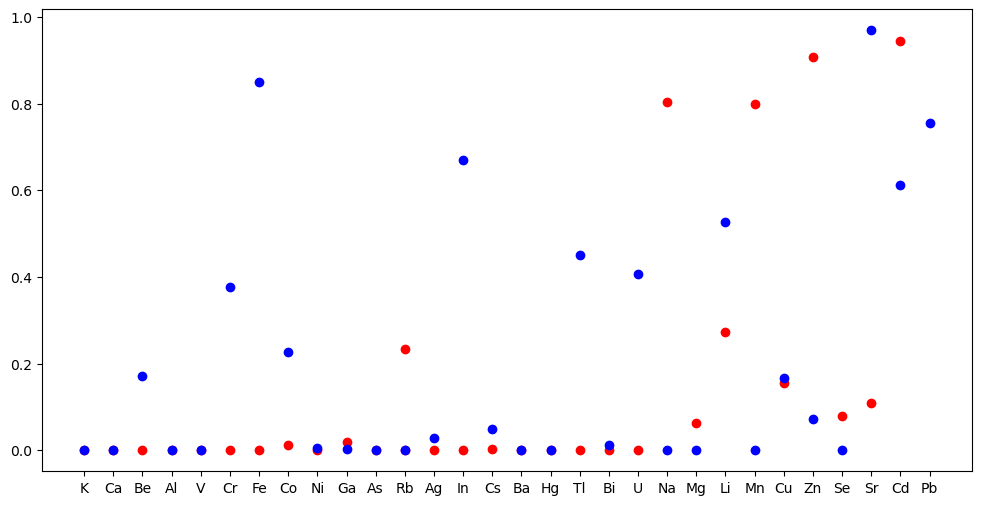

In [15]:
import matplotlib.pyplot as plt

# Set 1 values
features_set1 = ['K', 'Ca', 'Be', 'Al', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Ga',
                 'As', 'Rb', 'Ag', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Bi', 'U',
                 'Na', 'Mg', 'Li', 'Mn', 'Cu', 'Zn', 'Se', 'Sr', 'Cd', 'Rb']
p_values_set1 = [0, 0, 0, 0, 0, 0, 0, 0.013, 0, 0.019, 0, 0.001, 0, 0, 0.004, 0,
                 0, 0, 0, 0.001, 0.803, 0.062, 0.272, 0.800, 0.155, 0.908, 0.079,
                 0.108, 0.945, 0.234]

# Set 2 values
features_set2 = ['Hg', 'Mg', 'Al', 'As', 'K', 'Na', 'Ba', 'Ca', 'Rb', 'V',
                 'Se', 'Mn', 'Ga', 'Ni', 'Bi', 'Ag', 'Cs', 'Zn', 'Cu', 'Be',
                 'Co', 'Cr', 'U', 'Tl', 'Li', 'Cd', 'In', 'Pb', 'Fe', 'Sr']
p_values_set2 = [2.7919612164410684e-13, 7.989744236339922e-11, 2.2209270609448906e-07, 3.221226337704387e-07,
                 1.366819033714038e-06, 4.312708728835348e-06, 7.076722147521025e-06, 1.6264698741067636e-05,
                 0.00012848146263207315, 0.0004505366786628838, 0.0009843579017723215, 0.0015188217966462822,
                 0.0037831299738475916, 0.006221427481094771, 0.012504455146409632, 0.027565817102055322,
                 0.04852716583331214, 0.07149723836693625, 0.16705562429253093, 0.17253778356118873,
                 0.22700441573252078, 0.37651175636624334, 0.4072559577695647, 0.4512122057586787,
                 0.5267822075237036, 0.6112511726369209, 0.67072760091509, 0.7553579328259106,
                 0.8488131718521674, 0.9691065426659291]

# Plot the scatter diagram
plt.figure(figsize=(12, 6))
plt.scatter(features_set1, p_values_set1, color='red', label='Set 1')
plt.scatter(features_set2, p_values_set2, color='blue', label='Set 2')
plt


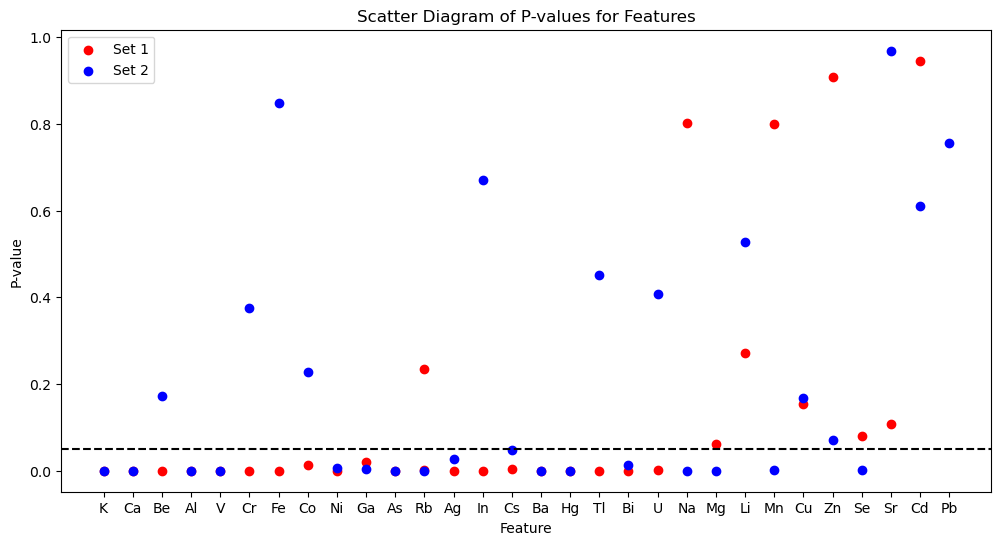

In [16]:
import matplotlib.pyplot as plt

# Set 1 values
features_set1 = ['K', 'Ca', 'Be', 'Al', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Ga',
                 'As', 'Rb', 'Ag', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Bi', 'U',
                 'Na', 'Mg', 'Li', 'Mn', 'Cu', 'Zn', 'Se', 'Sr', 'Cd', 'Rb']
p_values_set1 = [0, 0, 0, 0, 0, 0, 0, 0.013, 0, 0.019, 0, 0.001, 0, 0, 0.004, 0,
                 0, 0, 0, 0.001, 0.803, 0.062, 0.272, 0.800, 0.155, 0.908, 0.079,
                 0.108, 0.945, 0.234]

# Set 2 values
features_set2 = ['Hg', 'Mg', 'Al', 'As', 'K', 'Na', 'Ba', 'Ca', 'Rb', 'V',
                 'Se', 'Mn', 'Ga', 'Ni', 'Bi', 'Ag', 'Cs', 'Zn', 'Cu', 'Be',
                 'Co', 'Cr', 'U', 'Tl', 'Li', 'Cd', 'In', 'Pb', 'Fe', 'Sr']
p_values_set2 = [2.7919612164410684e-13, 7.989744236339922e-11, 2.2209270609448906e-07, 3.221226337704387e-07,
                 1.366819033714038e-06, 4.312708728835348e-06, 7.076722147521025e-06, 1.6264698741067636e-05,
                 0.00012848146263207315, 0.0004505366786628838, 0.0009843579017723215, 0.0015188217966462822,
                 0.0037831299738475916, 0.006221427481094771, 0.012504455146409632, 0.027565817102055322,
                 0.04852716583331214, 0.07149723836693625, 0.16705562429253093, 0.17253778356118873,
                 0.22700441573252078, 0.37651175636624334, 0.4072559577695647, 0.4512122057586787,
                 0.5267822075237036, 0.6112511726369209, 0.67072760091509, 0.7553579328259106,
                 0.8488131718521674, 0.9691065426659291]

plt.figure(figsize=(12, 6))
plt.scatter(features_set1, p_values_set1, color='red', label='Set 1')
plt.scatter(features_set2, p_values_set2, color='blue', label='Set 2')
plt.axhline(y=0.05, color='black', linestyle='--')  # Add black line at y=0.05
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.title('Scatter Diagram of P-values for Features')
plt.legend()
plt.show()

In [7]:
import statsmodels.api as sm
import pandas as pd

# Load the dataset
CKDU = pd.read_csv(r'C:\Users\acer\Desktop\ml\Test 1\CKDu_processed.csv')
Features = CKDU.iloc[:, 3:30]  # Select columns from 3 to 30
Features = pd.concat([Features, CKDU.iloc[:, [31, 32]]], axis=1)  # Append columns 32 and 33

# Verify the resulting DataFrame
print(Features.head())

Target = CKDU.iloc[:, 0]  # Target

# Add a constant column to the features
Features = sm.add_constant(Features)

# Perform linear regression- using OLS
lr = sm.OLS(Target, Features).fit()

# Get the p-values for each feature
p_values = lr.pvalues[1:]  # Exclude the constant column

# Assign p-values to features
feature_names = [ 'Na', 'Mg', 'K', 'Ca', 'Li', 'Be', 'Al', 'V',
                 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Se', 'Rb',
                 'Sr', 'Ag', 'Cd', 'In', 'Cs', 'Ba', 'Hg', 'Tl',  'Bi', 'U']

p_values_dict = dict(zip(feature_names, p_values))

# Sort p-values in ascending order
sorted_p_values = sorted(p_values_dict.items(), key=lambda x: x[1])

# Print the sorted p-values for each feature
for feature, p_value in sorted_p_values:
    print(f"Feature: {feature}, p-value: {p_value}")


    2347.3  13.48   82.73   96.55   5.09  0.04   672.33   140.08  198.29  \
0  2608.34  18.56  121.61   93.01   4.26  0.03  1336.42   132.40   90.94   
1  2067.15  10.87   99.16   52.95   4.18  0.06   745.32   118.93   86.71   
2  2284.80  17.03  155.17   95.94  18.94  0.04  1159.85   129.35  100.78   
3  1902.34   8.53   90.33  337.72   7.59  0.07  1279.45  1310.14  253.26   
4  2330.91  14.12  120.99  114.27   1.68  0.03   897.46   113.91   97.73   

      45.44  ...   91.67   1.01    0.42  52.87      1.9   873.78   2.1  \
0     42.29  ...  138.81   3.41    0.48  52.39     2.66    44.81  3.87   
1     28.36  ...   40.30   3.04    0.59  50.90     3.21    22.84  4.42   
2     48.13  ...  110.37   1.00    1.48  50.22     3.95  1238.85  4.33   
3  15117.70  ...    2.81   9.02  234.56  49.02  1639.67     3.42  0.47   
4     60.92  ...  138.92  15.56    0.95  49.16     2.82  1924.18  5.64   

   0.04.1  1.12     1.14  
0    0.07  1.89     1.38  
1    0.04  6.13     1.16  
2    0.07  2.35  

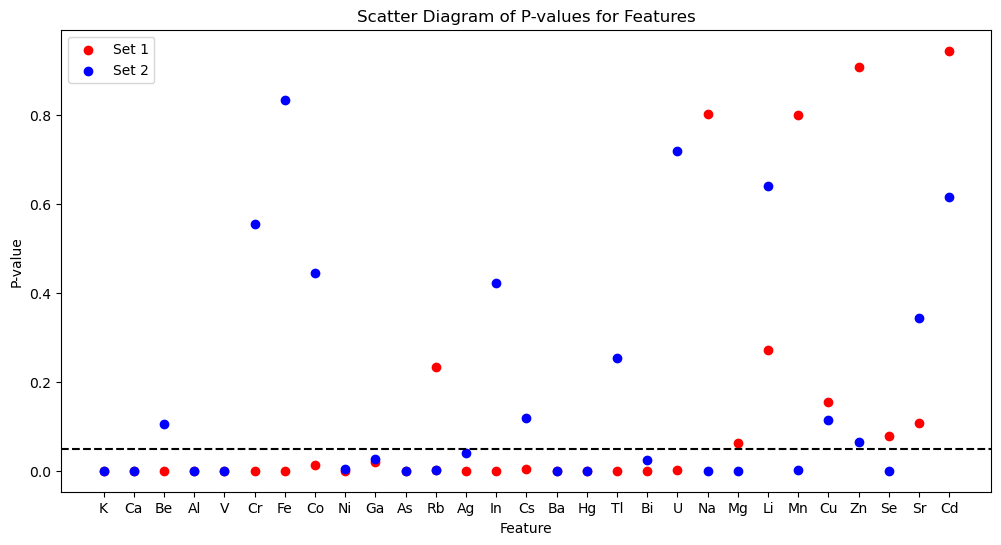

In [8]:
import matplotlib.pyplot as plt

# Set 1 values
features_set1 = ['K', 'Ca', 'Be', 'Al', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Ga',
                 'As', 'Rb', 'Ag', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Bi', 'U',
                 'Na', 'Mg', 'Li', 'Mn', 'Cu', 'Zn', 'Se', 'Sr', 'Cd', 'Rb']
p_values_set1 = [0, 0, 0, 0, 0, 0, 0, 0.013, 0, 0.019, 0, 0.001, 0, 0, 0.004, 0,
                 0, 0, 0, 0.001, 0.803, 0.062, 0.272, 0.800, 0.155, 0.908, 0.079,
                 0.108, 0.945, 0.234]

# Set 2 values
features_set2 = ['Hg', 'Mg', 'Al', 'Na', 'K', 'As', 'Ba', 'V', 'Ca', 'Se', 'Rb', 'Mn', 'Ni', 'Bi', 'Ga', 'Ag', 'Zn', 'Be', 'Cu', 'Cs', 'Tl', 'Sr', 'In', 'Co', 'Cr', 'Cd', 'Li', 'U', 'Fe']
p_values_set2 = [3.04510866298921e-11, 3.5730777471077433e-10, 5.362382548402651e-09, 1.618515467207351e-07, 6.355613243843061e-07, 2.831758388959895e-06, 7.689450088799302e-06, 1.3154992796217867e-05, 0.00032845605832434544, 0.00045710322920747027, 0.000744310582043106, 0.002559448397126386, 0.00411288973649364, 0.02402354075880183, 0.02647054042929467, 0.04091713660938496, 0.06414959071248823, 0.10579183372729445, 0.11385981910011704, 0.11945102369131815, 0.2540769542144678, 0.34291111158908516, 0.42147784251179643, 0.4445334246308009, 0.5541676319171487, 0.616437942085545, 0.6403418384573963, 0.719989141508548, 0.8344516659083837]
plt.figure(figsize=(12, 6))
plt.scatter(features_set1, p_values_set1, color='red', label='Set 1')
plt.scatter(features_set2, p_values_set2, color='blue', label='Set 2')
plt.axhline(y=0.05, color='black', linestyle='--')  # Add black line at y=0.05
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.title('Scatter Diagram of P-values for Features')
plt.legend()
plt.show()

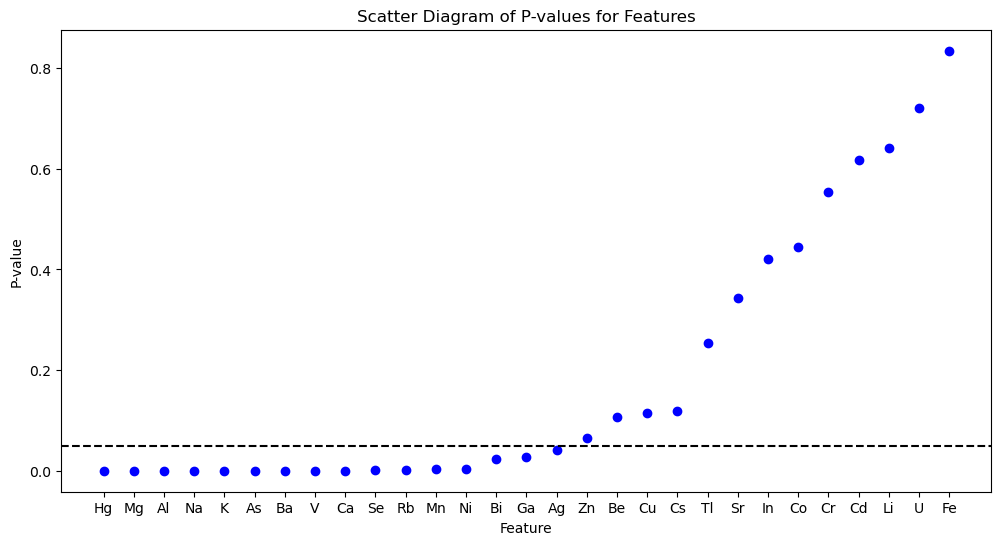

In [1]:
import matplotlib.pyplot as plt


# Set 2 values
features_set2 = ['Hg', 'Mg', 'Al', 'Na', 'K', 'As', 'Ba', 'V', 'Ca', 'Se', 'Rb', 'Mn', 'Ni', 'Bi', 'Ga', 'Ag', 'Zn', 'Be', 'Cu', 'Cs', 'Tl', 'Sr', 'In', 'Co', 'Cr', 'Cd', 'Li', 'U', 'Fe']
p_values_set2 = [3.04510866298921e-11, 3.5730777471077433e-10, 5.362382548402651e-09, 1.618515467207351e-07, 6.355613243843061e-07, 2.831758388959895e-06, 7.689450088799302e-06, 1.3154992796217867e-05, 0.00032845605832434544, 0.00045710322920747027, 0.000744310582043106, 0.002559448397126386, 0.00411288973649364, 0.02402354075880183, 0.02647054042929467, 0.04091713660938496, 0.06414959071248823, 0.10579183372729445, 0.11385981910011704, 0.11945102369131815, 0.2540769542144678, 0.34291111158908516, 0.42147784251179643, 0.4445334246308009, 0.5541676319171487, 0.616437942085545, 0.6403418384573963, 0.719989141508548, 0.8344516659083837]
plt.figure(figsize=(12, 6))

plt.scatter(features_set2, p_values_set2, color='blue', label='Set 2')
plt.axhline(y=0.05, color='black', linestyle='--')  # Add black line at y=0.05
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.title('Scatter Diagram of P-values for Features')

plt.show()

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
CKDU = pd.read_csv(r'C:\Users\acer\Desktop\ml\Test 1\CKDu_processed.csv')
X = CKDU.iloc[:, 1:33]  # Features
y = CKDU.iloc[:, 0]     # Target

# Assign feature names
feature_names = ['Age', 'S.creatinine', 'Na', 'Mg', 'K', 'Ca', 'Li', 'Be', 'Al', 'V',
                 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Se', 'Rb',
                 'Sr', 'Ag', 'Cd', 'In', 'Cs', 'Ba', 'Hg', 'Tl', 'Pb', 'Bi', 'U']
X.columns = feature_names

# Split the dataset into training and test sets
X_train, y_train= (X, y)

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a dataframe to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'P value': feature_importances})

# Sort the dataframe by importance (descending order)
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the most important features
print(importance_df)


KeyError: 'Importance'